In [42]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import chain
from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [85]:
# Read in the data
movies_df = pd.read_csv('../data/rotten_tomatoes_movies.csv')
critics_df = pd.read_csv('../data/rotten_tomatoes_critic_reviews.csv')

# Remove all movies from before 1998
movies_df = movies_df[movies_df['original_release_date'] >= '1998-01-01']

In [ ]:
# EDA on Title Length

# Create a new column which represents the number of words in the title of the movie
movies_df['movie_title_length'] = movies_df['movie_title'].apply(lambda x: len(x.split(' ')))

# Get the average length of all movies, Fresh movies, Certified-Fresh movies, and Rotten movies ratings
average_length_of_titles = movies_df['movie_title_length'].mean()
average_length_of_rotten_movies_titles = movies_df[movies_df['tomatometer_status'] == 'Rotten']['movie_title_length'].mean()
average_length_of_fresh_movies_titles = movies_df[movies_df['tomatometer_status'] == 'Fresh']['movie_title_length'].mean()
average_length_of_certified_fresh_movies_titles = movies_df[movies_df['tomatometer_status'] == 'Certified-Fresh']['movie_title_length'].mean()

# Print our results
print('Title Length EDA')
print('Average length of titles:', round(average_length_of_titles, 3))
print('Average length of rotten movies:', round(average_length_of_rotten_movies_titles, 3))
print('Average length of fresh movies:', round(average_length_of_fresh_movies_titles, 3))
print('Average length of certified fresh movies:', round(average_length_of_certified_fresh_movies_titles, 3))
print()

In [ ]:
# EDA on Release Date

# Convert the original_release_date column to a date type
movies_df['original_release_date'] = movies_df['original_release_date'].astype("datetime64")

# Create a histogram for all movies
plt.hist(movies_df['original_release_date'], bins=50)
plt.title('Histogram of Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.show()

# Create a histogram for all rotten movies, fresh movies, and certified-fresh movies
plt.hist(movies_df[movies_df['tomatometer_status'] == 'Rotten']['original_release_date'], bins=50, color='red', alpha=0.5, label='Rotten')
plt.hist(movies_df[movies_df['tomatometer_status'] == 'Fresh']['original_release_date'], bins=50, color='green', alpha=0.5, label='Fresh')
plt.hist(movies_df[movies_df['tomatometer_status'] == 'Certified-Fresh']['original_release_date'], bins=50, color='blue', alpha=0.5, label='Certified-Fresh')
plt.xlabel('Original Release Date')
plt.ylabel('Number of Movies')
plt.title('Release Date Distribution')
plt.legend()
plt.show()

In [ ]:
# EDA on Critic Review Date

# Convert the date column to a date type
critics_df['review_date'] = critics_df['review_date'].astype("datetime64")

# Create a histogram for all movies
plt.hist(critics_df['review_date'], bins=50)
plt.title('Histogram of Review Dates')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.show()

# Create a histogram for all rotten movies and fresh movies
plt.hist(critics_df[critics_df['review_type'] == 'Rotten']['review_date'], bins=50, color='red', alpha=0.5, label='Rotten')
plt.hist(critics_df[critics_df['review_type'] == 'Fresh']['review_date'], bins=50, color='green', alpha=0.5, label='Fresh')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.title('Review Date Distribution')
plt.legend()
plt.show()

In [ ]:
# EDA on reviews by movie release date

# Join the critics csv and movies csv on the rotten_tomatoes_link column
full_df = critics_df.merge(movies_df, on='rotten_tomatoes_link')

# Create a histogram for reviews of all movies
plt.hist(full_df['original_release_date'], bins=50)
plt.title('Histogram of Reviews by Release Date of the Movie')
plt.xlabel('Release Date')
plt.ylabel('Number of Reviews')
plt.show()

# Create a histogram for reviews of all rotten movies, fresh movies, and certified-fresh movies
plt.hist(full_df[full_df['tomatometer_status'] == 'Rotten']['original_release_date'], bins=50, color='red', alpha=0.5, label='Rotten')
plt.hist(full_df[full_df['tomatometer_status'] == 'Fresh']['original_release_date'], bins=50, color='green', alpha=0.5, label='Fresh')
plt.hist(full_df[full_df['tomatometer_status'] == 'Certified-Fresh']['original_release_date'], bins=50, color='blue', alpha=0.5, label='Certified-Fresh')
plt.xlabel('Release Date')
plt.ylabel('Number of Reviews')
plt.title('Reviews by Release Date of the Movie')
plt.legend()
plt.show()

In [ ]:
# EDA on most common words in the critics reviews

# Remove all rows with a null review
critics_df = critics_df[critics_df['review_content'].notnull()]

# Randomly sample a subset of the critics reviews
critics_df = critics_df.sample(n=1000000, random_state=1)

# Normalize the review content
critics_df['normalized_review'] = critics_df['review_content'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower()]))

# Create a new dataframe with the frequency of each word used in the critics reviews
review_words_frequency = Counter(chain.from_iterable(critics_df['normalized_review'].str.split()))

# Turn counter in a dataframe and sort
review_words_frequency_df = pd.DataFrame(list(review_words_frequency.items()), columns=['word', 'count']).sort_values('count', ascending=False)

# Filter out punctuation and stop words
contains_punctuation = lambda x: any(char in punctuation for char in x)
review_words_frequency_df['contains_punctuation'] = review_words_frequency_df['word'].apply(contains_punctuation)
review_words_frequency_df = review_words_frequency_df[review_words_frequency_df['contains_punctuation'] == False]
review_words_frequency_df = review_words_frequency_df.drop(columns=['contains_punctuation'])
review_words_frequency_df = review_words_frequency_df[~review_words_frequency_df['word'].isin(stopwords.words('english'))]

# Save the frequency dataframe to a csv
review_words_frequency_df.to_csv('../output/critic_review_word_frequency.csv', index=False)

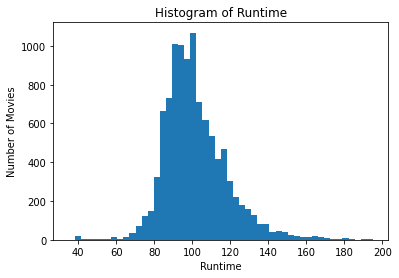

Mean Runtime for All Movies: 101.52
Standard Deviation of Runtime for All Movies: 16.71

Mean Runtime for Rotten Movies: 100.5
Standard Deviation of Runtime for Rotten Movies: 14.3

Mean Runtime for Fresh Movies: 100.16
Standard Deviation of Runtime for Fresh Movies: 18.27

Mean Runtime for Certified-Fresh Movies: 106.27
Standard Deviation of Runtime for Certified-Fresh Movies: 18.02



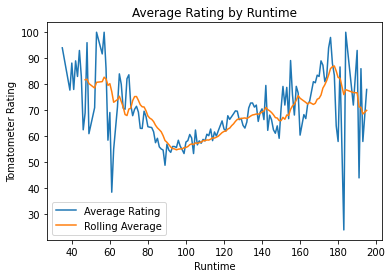

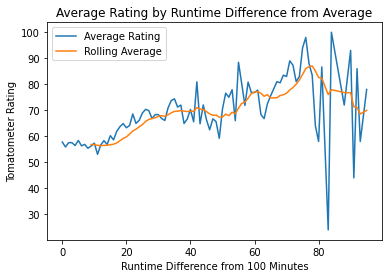

In [100]:
# EDA on runtime

# Only include movies between 30 minutes and 200 minutes
movies_df = movies_df[(movies_df['runtime'] >= 30) & (movies_df['runtime'] <= 200)]

# Remove all rows with a runtime of null or a tomatometer status of null
movies_df = movies_df[(movies_df['runtime'].notnull()) & (movies_df['tomatometer_status'].notnull())]

# Display a histogram of runtime
plt.hist(movies_df['runtime'], bins=50)
plt.title('Histogram of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.show()

# Print mean and standard deviation of runtime for all movies, rotten movies, fresh movies, and certified-fresh movies
print('Mean Runtime for All Movies:', round(movies_df['runtime'].mean(), 2))
print('Standard Deviation of Runtime for All Movies:', round(movies_df['runtime'].std(), 2))
print()

print('Mean Runtime for Rotten Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Rotten']['runtime'].mean(), 2))
print('Standard Deviation of Runtime for Rotten Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Rotten']['runtime'].std(), 2))
print()

print('Mean Runtime for Fresh Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Fresh']['runtime'].mean(), 2))
print('Standard Deviation of Runtime for Fresh Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Fresh']['runtime'].std(), 2))
print()

print('Mean Runtime for Certified-Fresh Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Certified-Fresh']['runtime'].mean(), 2))
print('Standard Deviation of Runtime for Certified-Fresh Movies:', round(movies_df[movies_df['tomatometer_status'] == 'Certified-Fresh']['runtime'].std(), 2))
print()

# Get tomatometer rating by runtime and plot a smoothed line chart
runtime_tomatometer_rating_df = movies_df.groupby('runtime').mean()
runtime_tomatometer_rating_df = runtime_tomatometer_rating_df.reset_index()

# Create a 5 minute rolling average of average tomatometer rating
runtime_tomatometer_rating_df['tomatometer_rating_rolling_average'] = runtime_tomatometer_rating_df['tomatometer_rating'].rolling(window=10).mean()

plt.plot(runtime_tomatometer_rating_df['runtime'], runtime_tomatometer_rating_df['tomatometer_rating'])
plt.plot(runtime_tomatometer_rating_df['runtime'], runtime_tomatometer_rating_df['tomatometer_rating_rolling_average'])

plt.title('Average Rating by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Tomatometer Rating')
plt.legend(['Average Rating', 'Rolling Average'])
plt.show()

# Same chart but with difference from 100 minutes
movies_df['runtime_difference_from_average'] = abs(movies_df['runtime'] - 100)

# Get tomatometer rating by runtime and plot a smoothed line chart
runtime_difference_tomatometer_rating_df = movies_df.groupby('runtime_difference_from_average').mean()
runtime_difference_tomatometer_rating_df = runtime_difference_tomatometer_rating_df.reset_index()

# Create a 5 minute rolling average of average tomatometer rating
runtime_difference_tomatometer_rating_df['tomatometer_rating_rolling_average'] = runtime_difference_tomatometer_rating_df['tomatometer_rating'].rolling(window=10).mean()

plt.plot(runtime_difference_tomatometer_rating_df['runtime_difference_from_average'], runtime_difference_tomatometer_rating_df['tomatometer_rating'])
plt.plot(runtime_difference_tomatometer_rating_df['runtime_difference_from_average'], runtime_difference_tomatometer_rating_df['tomatometer_rating_rolling_average'])

plt.title('Average Rating by Runtime Difference from Average')
plt.xlabel('Runtime Difference from 100 Minutes')
plt.ylabel('Tomatometer Rating')
plt.legend(['Average Rating', 'Rolling Average'])
plt.show()